<a href="https://colab.research.google.com/github/Ujjwal10228/GSoC-2025/blob/main/Data_Analysis_%26_Classical_GAN_on_HEP_GSoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
# Load dataset
file_path = ("/content/drive/MyDrive/Datasets/QIS_EXAM_200Events.npz")
data = np.load(file_path, allow_pickle=True)

print(data.files)
# train_data = data['training_input']
# test_data = data['test_input']


['training_input', 'test_input']


In [50]:
# Extract training and test data
train_data_dict = data['training_input'].item()
test_data_dict = data['test_input'].item()

In [51]:
X_label1 = train_data_dict['1']
Z_label0 = train_data_dict['0']

In [52]:
Z_label0[0: 4]

array([[-0.43079088,  0.86834819, -0.92614721, -0.92662029, -0.56900862],
       [ 0.33924198,  0.56155499,  0.93097459, -0.91631726, -0.54463516],
       [-0.42888879,  0.87064961, -0.92782179, -0.77533991, -0.58329176],
       [-0.43262871,  0.86128919, -0.92240878, -0.88048862, -0.49963115]])

In [53]:
# Stored last column in Y_real
Y_real = Z_label0[:,-1]
Y_real

array([-0.56900862, -0.54463516, -0.58329176, -0.49963115, -0.5149399 ,
       -0.66299335, -0.62187526, -0.40170562, -0.53550246, -0.50996097,
       -0.62698893, -0.56154273, -0.61433506, -0.5946945 , -0.56981171,
       -0.5334677 , -0.57999577, -0.58779546, -0.71591931, -0.51991104,
       -0.53408948, -0.54108498, -0.58735909, -0.53754642, -0.58674809,
       -0.57230481, -0.58893727, -0.58817068, -0.57251576, -0.59891923,
       -0.58793255, -0.73035246, -0.56418312, -0.5907458 , -0.52078182,
       -0.5345482 , -0.55077716, -0.56396112, -0.59011644, -0.59731155,
       -0.59800758, -0.64920965, -0.61041081, -0.62119434, -0.60215747,
       -0.59557556, -0.57646517, -0.62698962, -0.47476004, -0.5820067 ])

In [54]:
# Dropped last columns
Z_label0 = Z_label0[:, :-1]
Z_label0

array([[-0.43079088,  0.86834819, -0.92614721, -0.92662029],
       [ 0.33924198,  0.56155499,  0.93097459, -0.91631726],
       [-0.42888879,  0.87064961, -0.92782179, -0.77533991],
       [-0.43262871,  0.86128919, -0.92240878, -0.88048862],
       [-0.99925345, -0.99949586,  0.07753685, -0.84218034],
       [-0.99631106, -0.99775978,  0.0756427 , -0.54117216],
       [-0.42645921,  0.87141204, -0.92908723, -0.52650143],
       [ 0.34317906,  0.57125045,  0.92638556, -0.85113425],
       [-0.99904849, -0.99933931,  0.07737929, -0.81161066],
       [ 0.3371327 ,  0.55874622,  0.92996976, -0.9117092 ],
       [ 0.89649306, -0.95523176, -0.66298651, -0.71276678],
       [ 0.34293232,  0.56408047,  0.93448436, -0.88789589],
       [-0.43055876,  0.86615566, -0.92532229, -0.82531102],
       [ 0.33970589,  0.56676702,  0.92567667, -0.91562035],
       [-0.99924224, -0.99951208,  0.07752116, -0.8360764 ],
       [-0.43099755,  0.86651251, -0.925269  , -0.86698757],
       [-0.99937446, -0.

In [55]:
Z_label0.shape

(50, 4)

In [56]:
# Convert to DataFrame for easier correlation calculation
df = pd.DataFrame(np.hstack([X_label1, Z_label0, Y_real.reshape(-1, 1)]),
                  columns=['X1', 'X2', 'X3', 'X4', 'X5', 'Z1', 'Z2', 'Z3', 'Z4', 'Y_real'])


In [57]:
df.head()

,X1,X2,X3,X4,X5,Z1,Z2,Z3,Z4,Y_real
0,-0.422981,0.886309,-0.936612,-0.649443,-0.391935,-0.430791,0.868348,-0.926147,-0.926620,-0.569009
1,0.909994,-0.944291,-0.674616,-0.805186,-0.532965,0.339242,0.561555,0.930975,-0.916317,-0.544635
2,-0.999097,-0.999338,0.077493,-0.833512,-0.393053,-0.428889,0.870650,-0.927822,-0.775340,-0.583292
3,0.351527,0.579432,0.918064,-0.009234,-0.754124,-0.432629,0.861289,-0.922409,-0.880489,-0.499631
4,0.343999,0.573395,0.926162,-0.912692,-0.511493,-0.999253,-0.999496,0.077537,-0.842180,-0.514940


In [58]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Extract correlation of Y_real with Z (label 0 features)
correlation_with_Z = correlation_matrix.loc['Y_real', ['Z1', 'Z2', 'Z3', 'Z4']]


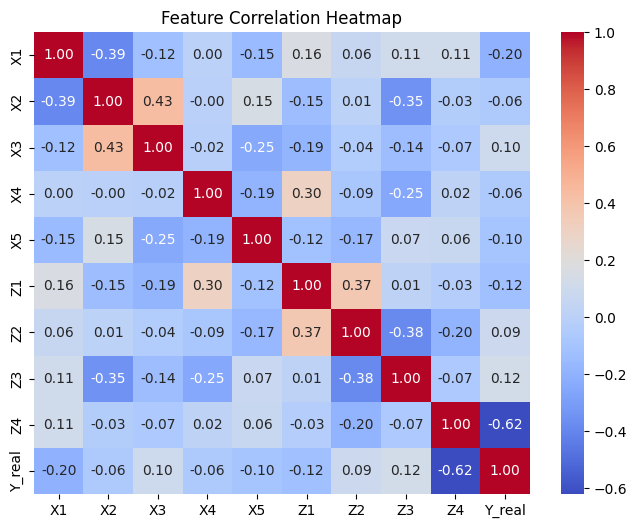

In [59]:
# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [100]:
# Print correlation insights
print("Correlation of Y_real (6th feature) with label 0 features (Z):")
print(correlation_with_Z)

# Decision Rule
if correlation_with_Z.abs().max() > 0.7:
    print("\n >> High correlation detected! We use (Discriminator modification).")
else:
    print("\n >> Low to moderate correlation. We use (Correlation Loss).")

Correlation of Y_real (6th feature) with label 0 features (Z):
Z1   -0.123235
Z2    0.086098
Z3    0.122950
Z4   -0.621426
Name: Y_real, dtype: float64

 >> Low to moderate correlation. We use (Correlation Loss).


### Applying Model

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset


In [62]:
# Normalize features for better GAN training
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
scaler_Z = StandardScaler()

X = scaler_X.fit_transform(X_label1)
Y_real = scaler_Y.fit_transform(Y_real.reshape(-1, 1))
Z = scaler_Z.fit_transform(Z_label0)

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_real_tensor = torch.tensor(Y_real, dtype=torch.float32)
Z_tensor = torch.tensor(Z, dtype=torch.float32)

In [63]:
batch_size = 32
dataset = TensorDataset(X_tensor, Y_real_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [70]:
X_test_label1 = test_data_dict['1']
Z_test_label0 = test_data_dict['0']

# Stored last column in Y_real
Y_test_real = Z_test_label0[:,-1]
print(Y_test_real[:5])

# Dropped last columns
Z_test_label0 = Z_test_label0[:, :-1]
# Z_test_label0



[-0.53944676 -0.6058888  -0.60501115 -0.61107892 -0.45954928]


In [98]:
# Normalize features for better GAN training
# scaler_X = StandardScaler()
# scaler_Y = StandardScaler()
# scaler_Z = StandardScaler()

X_test = scaler_X.fit_transform(X_test_label1)
Y_real_test = scaler_Y.fit_transform(Y_test_real.reshape(-1, 1))
Z_test = scaler_Z.fit_transform(Z_test_label0)

# Convert to tensors
X_tensor_test = torch.tensor(X_test, dtype=torch.float32)
Y_real_tensor_test = torch.tensor(Y_real_test, dtype=torch.float32)
Z_tensor_test = torch.tensor(Z_test, dtype=torch.float32)




### Model with Corr Penalty

In [82]:
input_dim_X = 5  # Features of label 1
input_dim_Z = 4  # Features of label 0
output_dim_Y = 1  # The 6th feature to generate


In [83]:
class Generator(nn.Module):
    def __init__(self, input_dim_X, input_dim_Z, output_dim_Y):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim_X + input_dim_Z, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim_Y)
        )

    def forward(self, x, z):
        input_data = torch.cat((x, z), dim=1)  # Combine X and Z
        return self.model(input_data)

# Discriminator

class Discriminator(nn.Module):
    def __init__(self, input_dim_X, input_dim_Z, output_dim_Y):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim_X + input_dim_Z + output_dim_Y, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x, y, z):
        input_data = torch.cat((x, y, z), dim=1)
        return self.model(input_data)

In [84]:
def correlation_penalty(y_fake, z):
    """Penalize if y_fake is too correlated with label 0 features (Z)."""
    corr_matrix = torch.corrcoef(torch.cat((y_fake, z), dim=1).T)  # Compute correlation
    corr_loss = torch.abs(corr_matrix[:y_fake.shape[1], -z.shape[1]:]).mean()  # Mean correlation
    return corr_loss

# Initialize models
generator = Generator(input_dim_X, input_dim_Z, output_dim_Y)
discriminator = Discriminator(input_dim_X, input_dim_Z, output_dim_Y)

# Define optimizers
lr = 0.0001
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

# Train the GAN
epochs = 10000
lambda_corr = 0.1  # Weight for correlation penalty

for epoch in range(epochs):
    # Generate fake Y
    Y_fake = generator(X_tensor, Z_tensor)

    # Train Discriminator
    optimizer_D.zero_grad()
    real_pred = discriminator(X_tensor, Y_real_tensor, Z_tensor)
    fake_pred = discriminator(X_tensor, Y_fake.detach(), Z_tensor)

    loss_D_real = criterion(real_pred, torch.ones_like(real_pred))
    loss_D_fake = criterion(fake_pred, torch.zeros_like(fake_pred))
    loss_D = (loss_D_real + loss_D_fake) / 2
    loss_D.backward()
    optimizer_D.step()

     # Train Generator
    optimizer_G.zero_grad()
    fake_pred = discriminator(X_tensor, Y_fake, Z_tensor)
    loss_G = criterion(fake_pred, torch.ones_like(fake_pred))  # Fool discriminator

    # Add correlation penalty
    corr_penalty = correlation_penalty(Y_fake, Z_tensor)
    loss_G += lambda_corr * corr_penalty  # Add penalty to generator loss

    loss_G.backward()
    optimizer_G.step()

    # Print progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss_D = {loss_D.item():.4f}, Loss_G = {loss_G.item():.4f}, Corr_Penalty = {corr_penalty.item():.4f}")



Epoch 0: Loss_D = 0.6984, Loss_G = 0.8040, Corr_Penalty = 0.2588
Epoch 100: Loss_D = 0.6872, Loss_G = 0.7074, Corr_Penalty = 0.0025
Epoch 200: Loss_D = 0.6771, Loss_G = 0.7076, Corr_Penalty = 0.0023
Epoch 300: Loss_D = 0.6594, Loss_G = 0.7232, Corr_Penalty = 0.0024
Epoch 400: Loss_D = 0.6318, Loss_G = 0.7589, Corr_Penalty = 0.0023
Epoch 500: Loss_D = 0.5955, Loss_G = 0.8154, Corr_Penalty = 0.0017
Epoch 600: Loss_D = 0.5580, Loss_G = 0.8878, Corr_Penalty = 0.0084
Epoch 700: Loss_D = 0.5396, Loss_G = 0.9435, Corr_Penalty = 0.1662
Epoch 800: Loss_D = 0.6490, Loss_G = 0.8227, Corr_Penalty = 0.3345
Epoch 900: Loss_D = 0.6986, Loss_G = 0.8570, Corr_Penalty = 0.3859
Epoch 1000: Loss_D = 0.5987, Loss_G = 1.0678, Corr_Penalty = 0.3492
Epoch 1100: Loss_D = 0.6556, Loss_G = 0.8711, Corr_Penalty = 0.3398
Epoch 1200: Loss_D = 0.6770, Loss_G = 0.8833, Corr_Penalty = 0.2853
Epoch 1300: Loss_D = 0.6691, Loss_G = 0.8072, Corr_Penalty = 0.3447
Epoch 1400: Loss_D = 0.6761, Loss_G = 0.7691, Corr_Penalty =

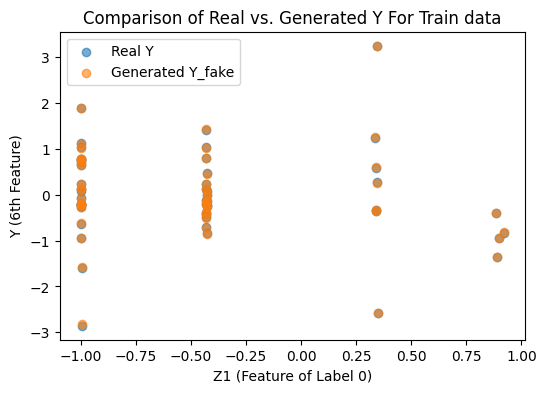

In [97]:
# Visualize Results
with torch.no_grad():
    Y_fake_final = generator(X_tensor, Z_tensor).numpy()

plt.figure(figsize=(6, 4))
plt.scatter(Z_label0[:, 0], Y_real, label="Real Y", alpha=0.6)
plt.scatter(Z_label0[:, 0], Y_fake_final, label="Generated Y_fake", alpha=0.6)
plt.xlabel("Z1 (Feature of Label 0)")
plt.ylabel("Y (6th Feature)")
plt.title("Comparison of Real vs. Generated Y For Train data")
plt.legend()
plt.show()

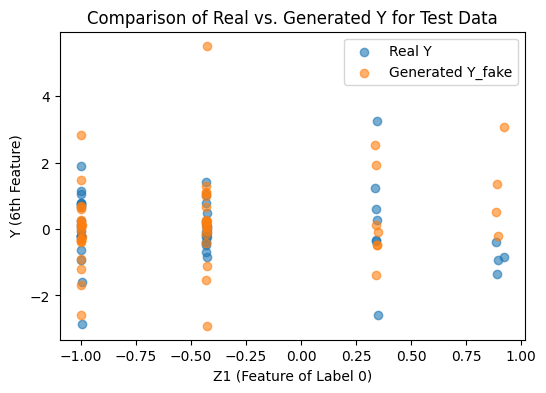

In [90]:
# Visualize Results
with torch.no_grad():
    Y_fake_final = generator(X_tensor_test, Z_tensor_test).numpy()

plt.figure(figsize=(6, 4))
plt.scatter(Z_label0[:, 0], Y_real, label="Real Y", alpha=0.6)
plt.scatter(Z_label0[:, 0], Y_fake_final, label="Generated Y_fake", alpha=0.6)
plt.xlabel("Z1 (Feature of Label 0)")
plt.ylabel("Y (6th Feature)")
plt.title("Comparison of Real vs. Generated Y for Test Data")
plt.legend()
plt.show()

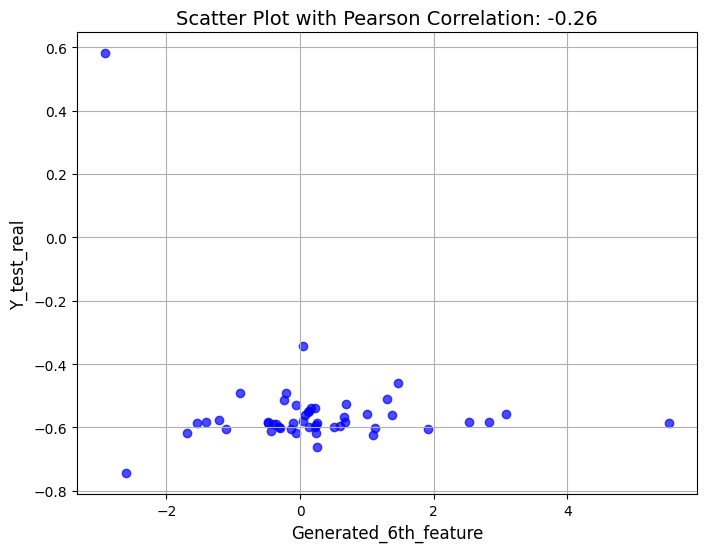

In [87]:
from scipy.stats import pearsonr

with torch.no_grad():
    generated_6th_feature = generator(X_tensor_test, Z_tensor_test).numpy()

generated_6th_feature = generated_6th_feature.flatten()
Y_test_real = Y_test_real.flatten()

# Calculate Pearson correlation
correlation, _ = pearsonr(generated_6th_feature, Y_test_real)

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(generated_6th_feature, Y_test_real, alpha=0.7, color='blue')
plt.title(f"Scatter Plot with Pearson Correlation: {correlation:.2f}", fontsize=14)
plt.xlabel("Generated_6th_feature", fontsize=12)
plt.ylabel("Y_test_real", fontsize=12)
plt.grid(True)
plt.show()

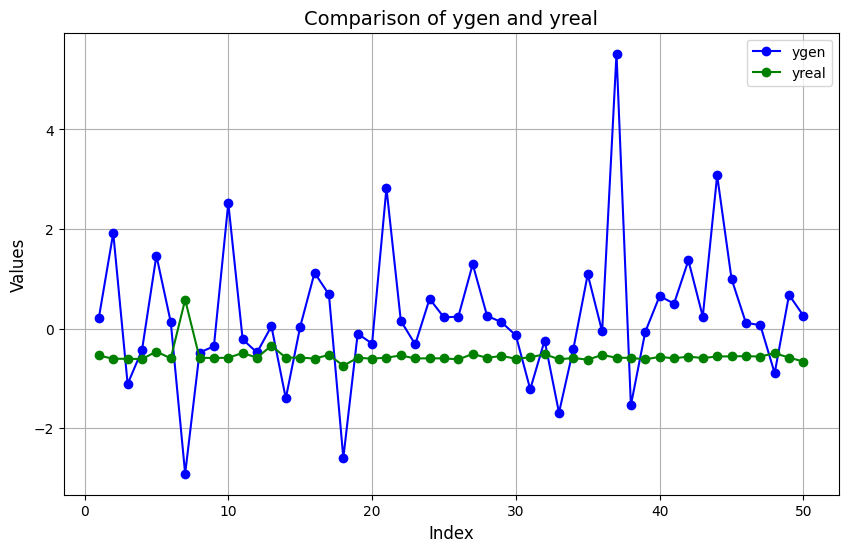

In [88]:
indices = np.arange(1, 51)  # 1 to 50 for x-axis

# Plot the linear graph for ygen and yreal
plt.figure(figsize=(10, 6))
plt.plot(indices, generated_6th_feature, label='ygen', color='blue', marker='o', linestyle='-')
plt.plot(indices, Y_test_real, label='yreal', color='green', marker='o', linestyle='-')

# Add labels, title, and legend
plt.title("Comparison of ygen and yreal", fontsize=14)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

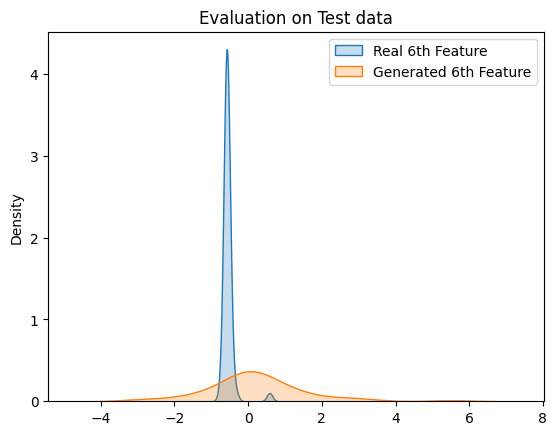

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

with torch.no_grad():
    Y_gen = generator(X_tensor_test, Z_tensor_test).numpy()

# Generate features
# Y_gen = generate_feature(X)

# Convert tensors back to numpy
Y_real_np = scaler_Y.inverse_transform(Y_real_test)

# Plot comparison
plt.title("Evaluation on Test data")
sns.kdeplot(Y_real_np.flatten(), label="Real 6th Feature", fill=True)
sns.kdeplot(Y_gen.flatten(), label="Generated 6th Feature", fill=True)
plt.legend()
plt.show()

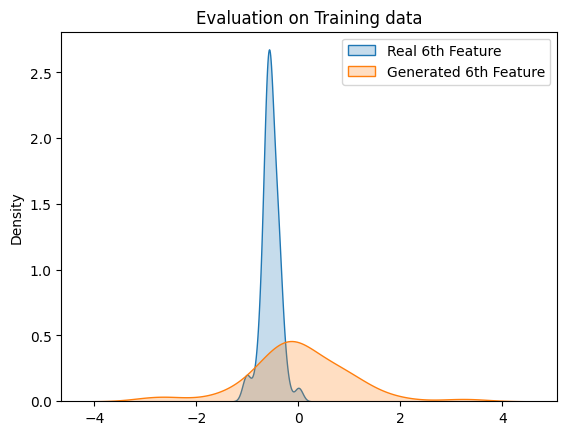

In [96]:

with torch.no_grad():
    Y_gen = generator(X_tensor, Z_tensor).numpy()

# Convert tensors back to numpy
Y_real_np = scaler_Y.inverse_transform(Y_real)

# Plot comparison
plt.title("Evaluation on Training data")
sns.kdeplot(Y_real_np.flatten(), label="Real 6th Feature", fill=True)
sns.kdeplot(Y_gen.flatten(), label="Generated 6th Feature", fill=True)
plt.legend()
plt.show()

In [91]:
from scipy.stats import wasserstein_distance, entropy
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import torch.nn.functional as F
from sklearn.metrics.pairwise import cosine_similarity

def wasserstein_fidelity(y_real, y_fake):
    return wasserstein_distance(y_real.flatten(), y_fake.flatten())


def kl_divergence(y_real, y_fake):
    # Normalize to ensure they are probability distributions
    y_real = y_real / y_real.sum()
    y_fake = y_fake / y_fake.sum()

    return entropy(y_real, y_fake)  # KL Divergence


def compute_auc(y_real, y_fake):
    X = np.vstack([y_real, y_fake])  # Combine real and fake data
    y = np.hstack([np.ones(len(y_real)), np.zeros(len(y_fake))])  # Labels: 1 for real, 0 for fake

    clf = LogisticRegression()
    clf.fit(X, y)

    y_pred = clf.predict_proba(X)[:, 1]  # Get probability of being real
    return roc_auc_score(y, y_pred)


def mse_loss(y_real, y_fake):
    return F.mse_loss(y_real, y_fake)


def cosine_sim(y_real, y_fake):
    return cosine_similarity(y_real.reshape(1, -1), y_fake.reshape(1, -1))[0][0]



In [92]:
def evaluate_qgan(y_real, y_fake):
    y_real_np = y_real.detach().cpu().numpy() if isinstance(y_real, torch.Tensor) else y_real
    y_fake_np = y_fake.detach().cpu().numpy() if isinstance(y_fake, torch.Tensor) else y_fake

    results = {
        "KL Divergence": kl_divergence(y_real_np, y_fake_np),
        "Wasserstein Fidelity": wasserstein_fidelity(y_real_np, y_fake_np),
        "AUC-ROC": compute_auc(y_real_np, y_fake_np),
        "MSE": mse_loss(torch.tensor(y_real_np), torch.tensor(y_fake_np)).item(),
        "Cosine Similarity": cosine_sim(y_real_np, y_fake_np),
    }

    return results

In [93]:
evaluation_results = evaluate_qgan(Y_real,Y_fake_final )
print("For Test data")
print(evaluation_results)


For Test data
{'KL Divergence': array([inf]), 'Wasserstein Fidelity': np.float64(0.288189429715829), 'AUC-ROC': np.float64(0.5476), 'MSE': 2.4994254047599633, 'Cosine Similarity': np.float64(0.1562588392671692)}


In [94]:
evaluation_results = evaluate_qgan(Y_real,Y_fake )
print("For Training data")
print(evaluation_results)


For Training data
{'KL Divergence': array([inf]), 'Wasserstein Fidelity': np.float64(0.010968340846382187), 'AUC-ROC': np.float64(0.5004), 'MSE': 0.0002285614506522614, 'Cosine Similarity': np.float64(0.9998885782483528)}
